In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
coincap = pd.read_csv('data/coin-aggregator.csv')

In [4]:
coincap.describe()

,ath,ath_change_percentage,atl,atl_change_percentage,circulating_supply,current_price,fully_diluted_valuation,high_24h,low_24h,market_cap,...,market_cap_rank,max_supply,price_change_24h,price_change_percentage_24h,roi,roi.percentage,roi.times,total_supply,total_volume,total_holder
count,3.693000e+03,3693.000000,3693.000000,3.693000e+03,3.693000e+03,3.692000e+03,1.704000e+03,3.489000e+03,3489.000000,3.693000e+03,...,3693.000000,1.704000e+03,3489.000000,3.489000e+03,0.0,425.000000,425.000000,3.605000e+03,3.693000e+03,3.693000e+03
mean,4.117585e+04,-91.376295,43.204869,3.870345e+45,5.232613e+19,1.350927e+02,1.643980e+10,1.469662e+02,112.440950,3.464898e+08,...,1847.041159,2.464804e+20,-7.646474,8.409076e+30,NaN,245.715169,2.457152,1.165065e+20,9.909355e+07,1.782826e+04
std,2.261420e+06,14.813015,765.174210,2.288699e+47,3.179796e+21,1.864341e+03,6.531120e+11,2.040384e+03,1551.920060,1.003586e+10,...,1066.173512,1.017453e+22,221.092637,4.967052e+32,NaN,1914.674757,19.146748,6.995144e+21,2.580286e+09,1.250829e+05
min,1.109000e-15,-100.000000,-79.102100,-1.104998e+02,0.000000e+00,1.160000e-16,1.348761e+04,1.420000e-16,0.000000,8.966000e+03,...,1.000000,1.000000e+02,-11953.310075,-9.986586e+01,NaN,-100.144544,-1.001445,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.392320e-01,-99.080670,0.000310,9.997030e+00,9.635524e+06,2.406105e-03,1.567021e+06,3.296080e-03,0.002242,2.585670e+05,...,925.000000,5.000000e+07,-0.017019,-1.448405e+01,NaN,-99.251570,-0.992516,2.100000e+07,1.555070e+03,9.200000e+01
50%,1.063000e+00,-96.658040,0.008245,4.882189e+01,6.980347e+07,2.800752e-02,8.913688e+06,3.533820e-02,0.025700,1.331447e+06,...,1850.000000,2.500000e+08,-0.001019,-7.128080e+00,NaN,-93.177879,-0.931779,2.000000e+08,4.119000e+04,2.244000e+03
75%,7.450000e+00,-90.574130,0.121252,6.595509e+02,5.061945e+08,3.097345e-01,5.716729e+07,3.690510e-01,0.288062,8.512920e+06,...,2769.000000,1.000000e+09,-0.000002,-1.118240e+00,NaN,-32.892857,-0.328929,1.000000e+09,4.397980e+05,8.897000e+03
max,1.372421e+08,0.000000,27971.000000,1.390398e+49,1.932364e+23,5.139100e+04,2.695383e+13,5.377500e+04,31929.000000,5.508617e+11,...,3693.000000,4.200000e+23,984.890000,2.933926e+34,NaN,26718.739393,267.187394,4.200000e+23,1.341177e+11,5.322589e+06


In [5]:
coincap.columns

Index(['_id', 'ath', 'ath_change_percentage', 'ath_date', 'atl',
       'atl_change_percentage', 'atl_date', 'circulating_supply',
       'current_price', 'fully_diluted_valuation', 'high_24h', 'id', 'image',
       'last_updated', 'low_24h', 'market_cap', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'market_cap_rank', 'max_supply',
       'name', 'price_change_24h', 'price_change_percentage_24h', 'roi',
       'roi.currency', 'roi.percentage', 'roi.times', 'symbol', 'total_supply',
       'total_volume', 'total_holder'],
      dtype='object')

In [6]:
coincap.shape[0]

3693

# Helper Functions

In [7]:
def coin_cap_filter_by_atr(coin_cap: pd.DataFrame, atr:str, range):
  if range[1] == 0:
    return coin_cap.loc[(coin_cap[atr] > range[0])]     
  return coin_cap.loc[(coin_cap[atr] > range[0]) & (coin_cap[atr] < range[1])]

In [8]:
def get_number_of_project_in_range(coin_cap: pd.DataFrame, atr: str, market_range: list, market_range_name: list):

  # Coin cap list in range
  data_list = []
  
  for i in range (len(market_range)):
    if i != (len(market_range) - 1):
      market_cap = coin_cap_filter_by_atr(coin_cap, atr, market_range[i:i+2])
      print(market_range_name[i], '-->', market_range_name[i+1], ': ', market_cap.shape[0])
      data_list.append(market_cap)
    else:
      market_cap = coin_cap_filter_by_atr(coin_cap, atr, [market_range[i], 0])
      print(market_range_name[i], '-->', ' oo: ', market_cap.shape[0])
      data_list.append(market_cap)    

  return data_list
  

In [21]:
def save_hist_of_market_cap_range_list(data_list: list, atr: str, range_name: list, prefix: str, x_title: str):
  
  for i in range(len(range_name)):
    fig, ax = plt.subplots(figsize=(20, 30))

    sns.kdeplot(data = data_list[i], x = atr, ax = ax)

    ax.set_xlim((data_list[i][atr].min(), data_list[i][atr].max()))
    ax2 = ax.twinx()
    sns.histplot(data = data_list[i], x = atr, ax = ax2, bins= 100)
    
    if i != len(range_name) - 1:
      ax.set_title(prefix + ' between {} and {} '.format(range_name[i], range_name[i + 1]) + x_title)
      ax.set_xlabel(x_title)
      fig.patch.set_facecolor('white')
      plt.savefig('analysis/' + atr + '_distribution_from_{}_to_{}.png'.format(range_name[i], range_name[i + 1]))
    else:
      ax.set_title(prefix + ' larger than {} '.format(range_name[i]) + x_title)
      ax.set_xlabel(x_title)
      fig.patch.set_facecolor('white')
      plt.savefig('analysis/' + atr + '_distribution_larger_{}.png'.format(range_name[i]), dpi = 300)
      



# Coin Market Cap 

In [22]:
def coin_market_cap_filter(coincap: pd.DataFrame, range):
  if range[1] == 0:
    return coincap.loc[(coincap['market_cap'] > range[0])]     
  return coincap.loc[(coincap['market_cap'] > range[0]) & (coincap['market_cap'] < range[1])]

In [23]:
market_range = [0, 5e5, 5e6, 300e6, 1e9]
market_range_str = ['0', '500_thousand', '5_million', '300_million', '1_billion']

print('Number of market cap per range:')
market_cap_list = get_number_of_project_in_range(coincap, 'market_cap', market_range, market_range_str)

Number of market cap per range:
0 --> 500_thousand :  1289
500_thousand --> 5_million :  1254
5_million --> 300_million :  1015
300_million --> 1_billion :  74
1_billion -->  oo:  61


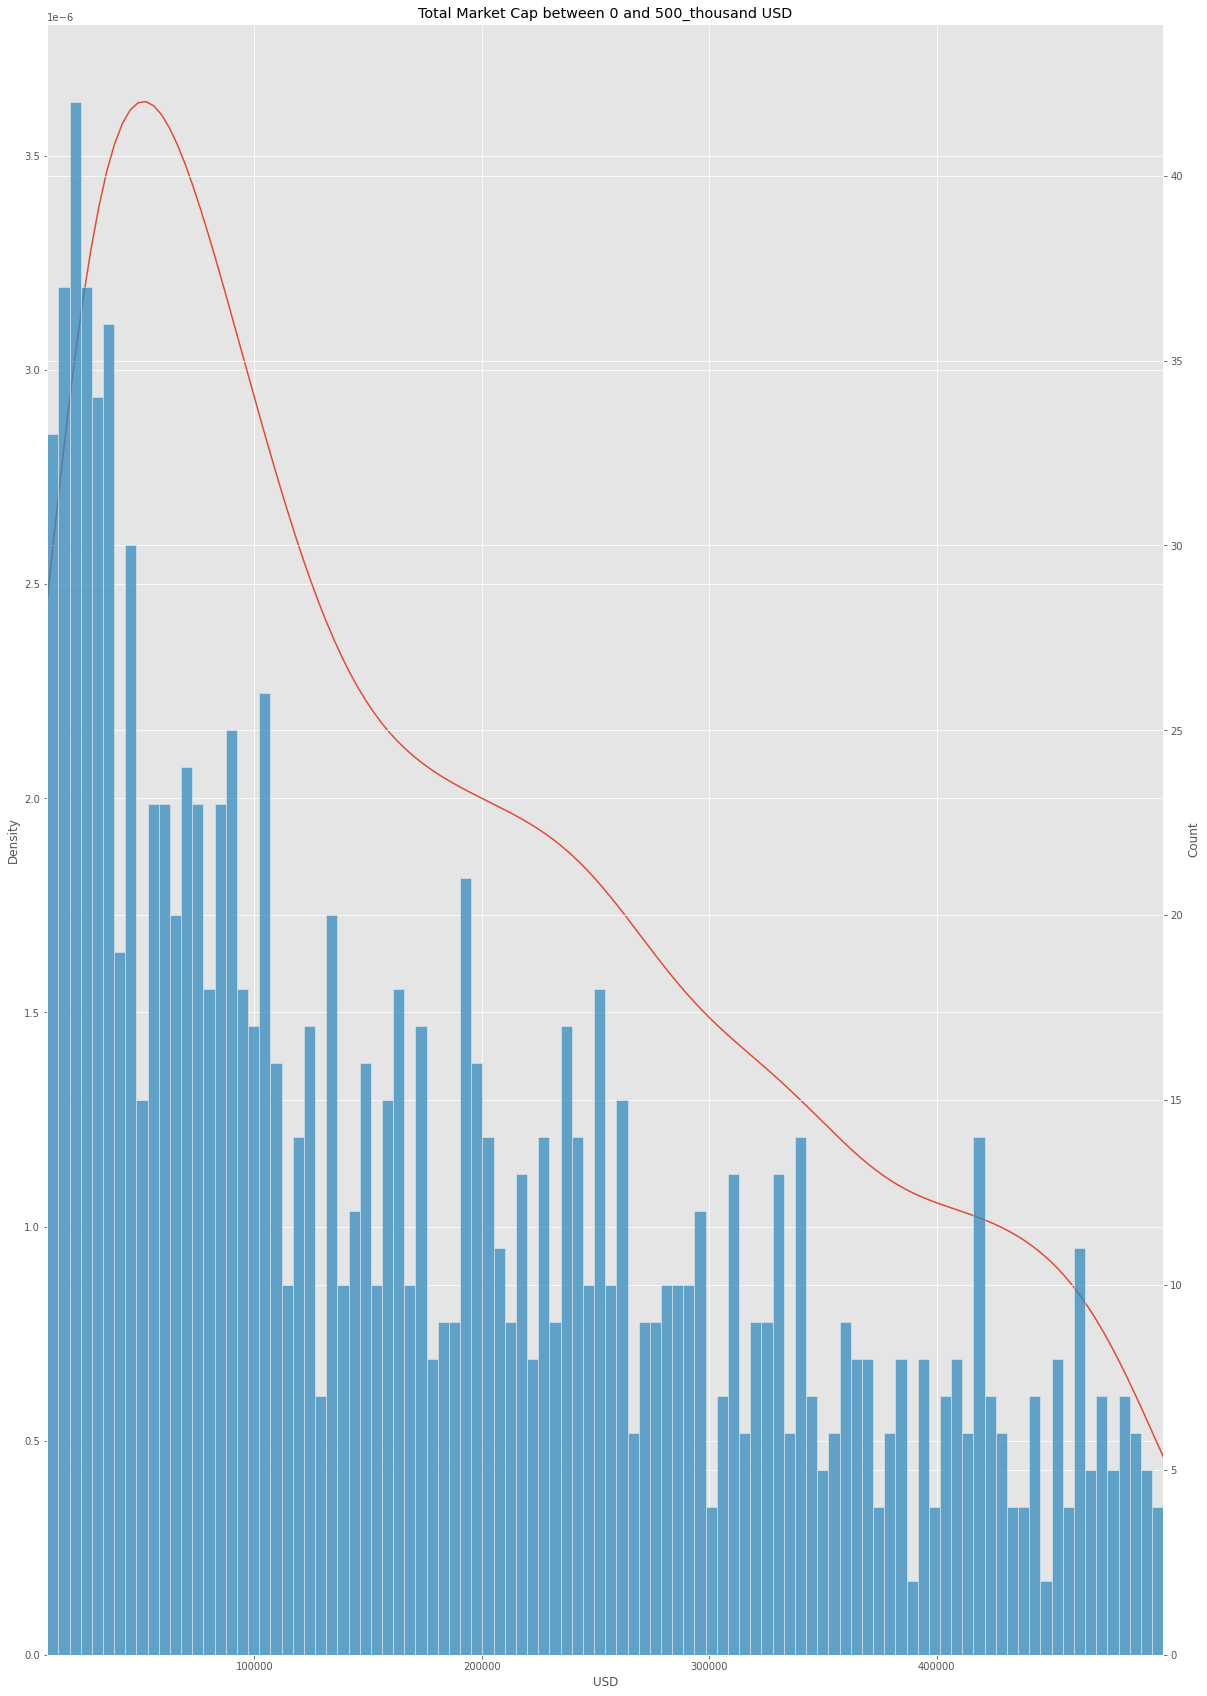

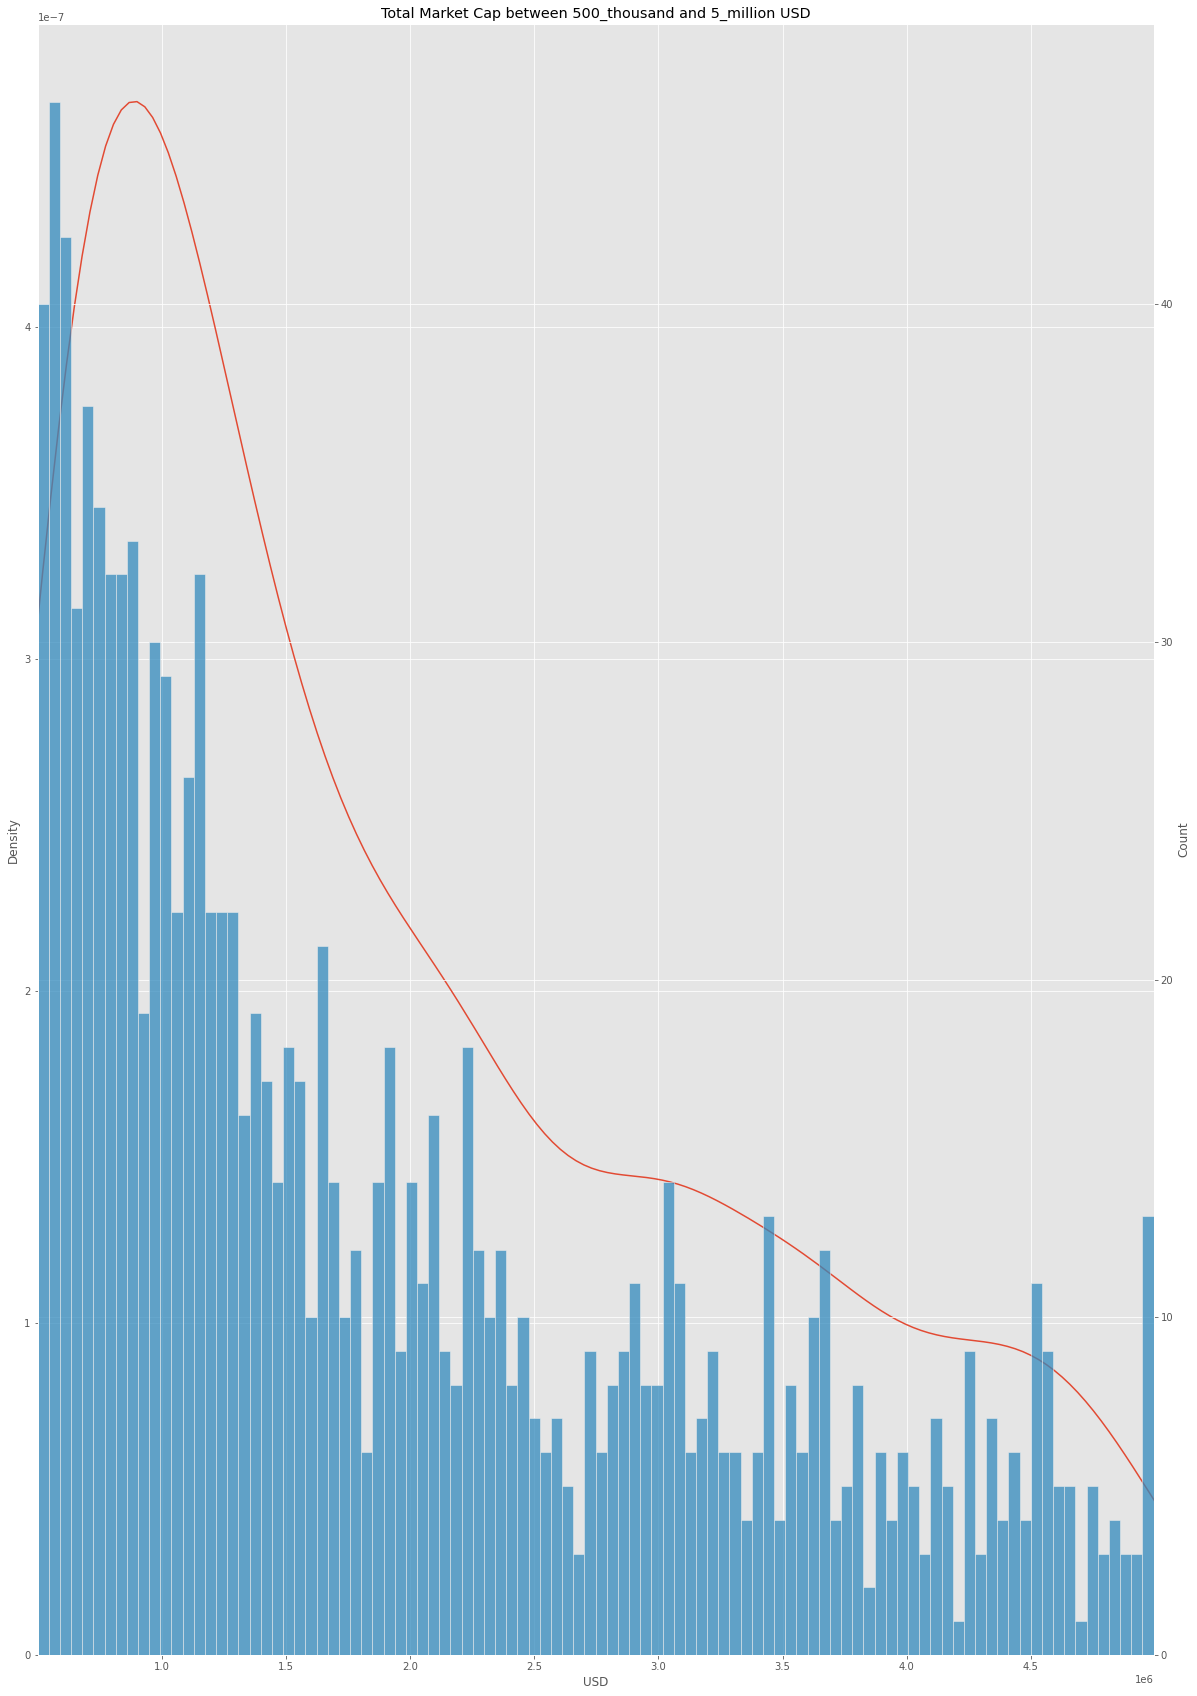

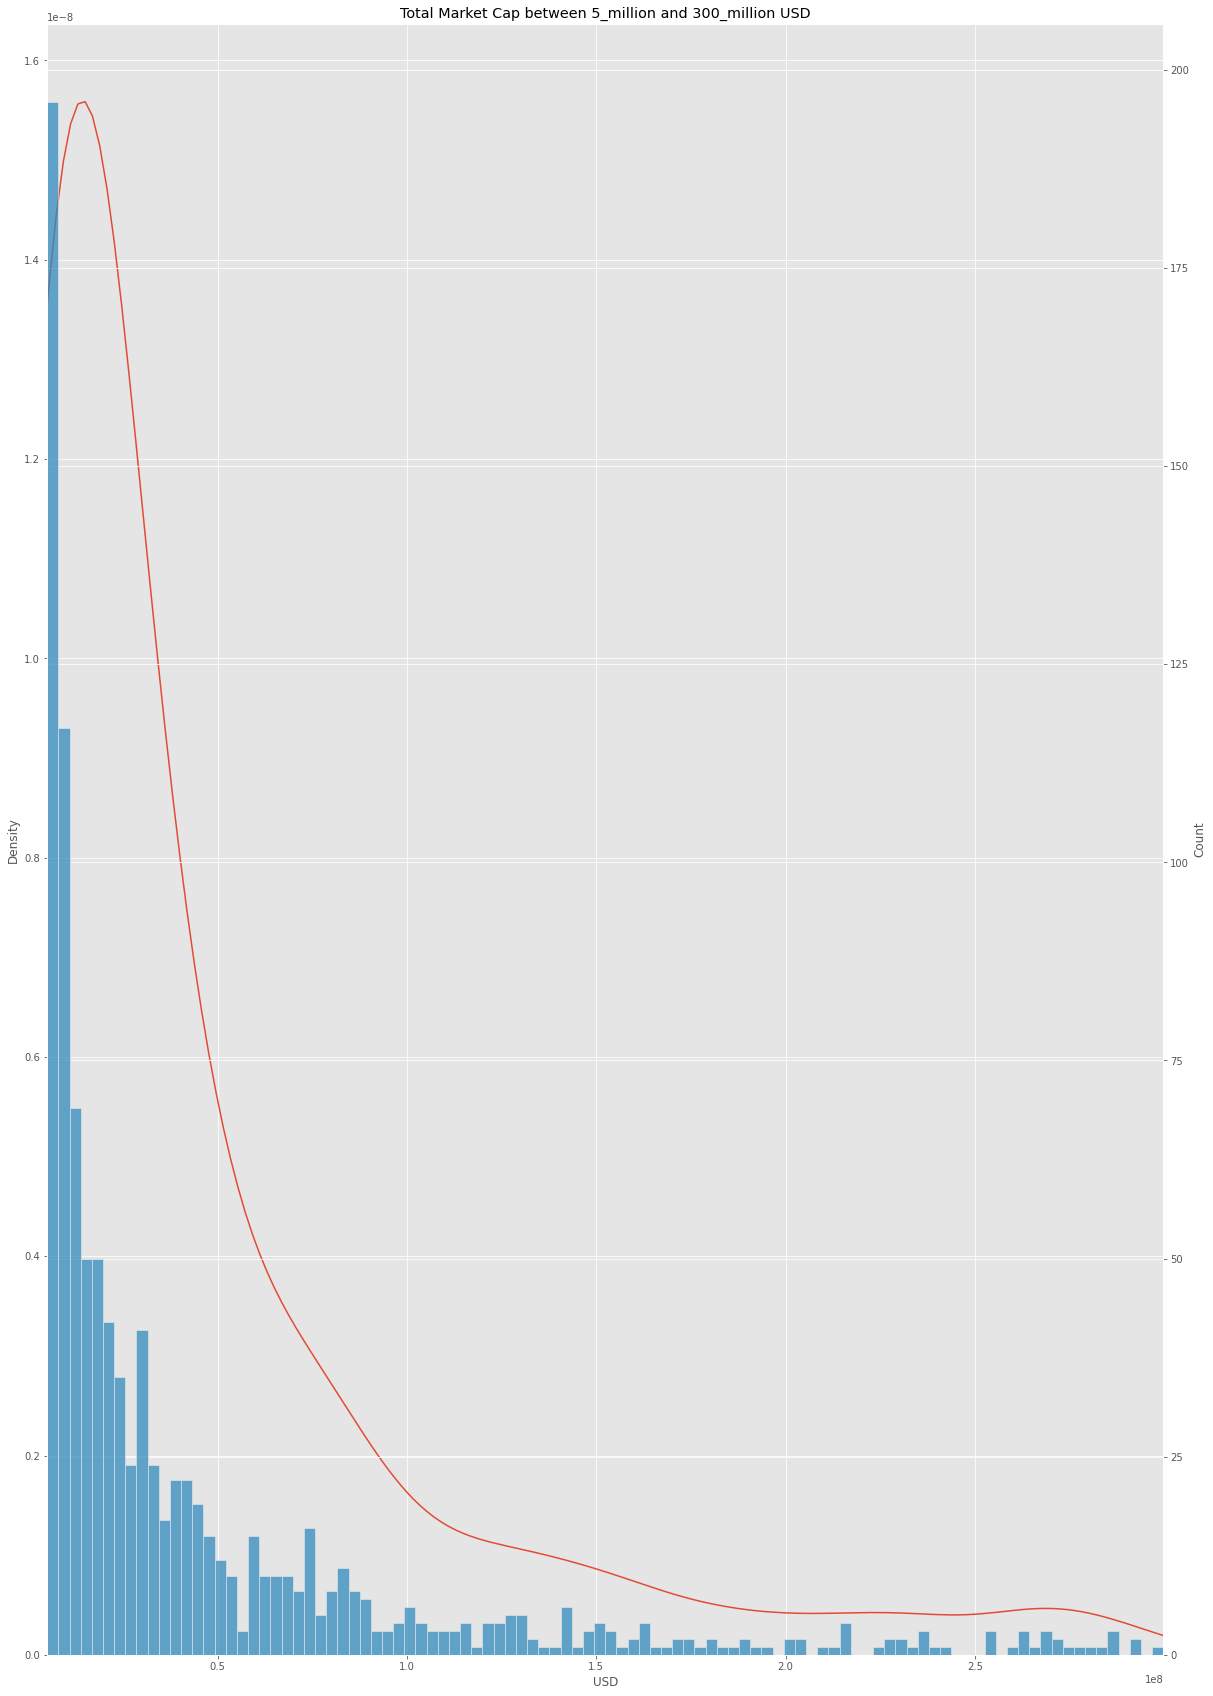

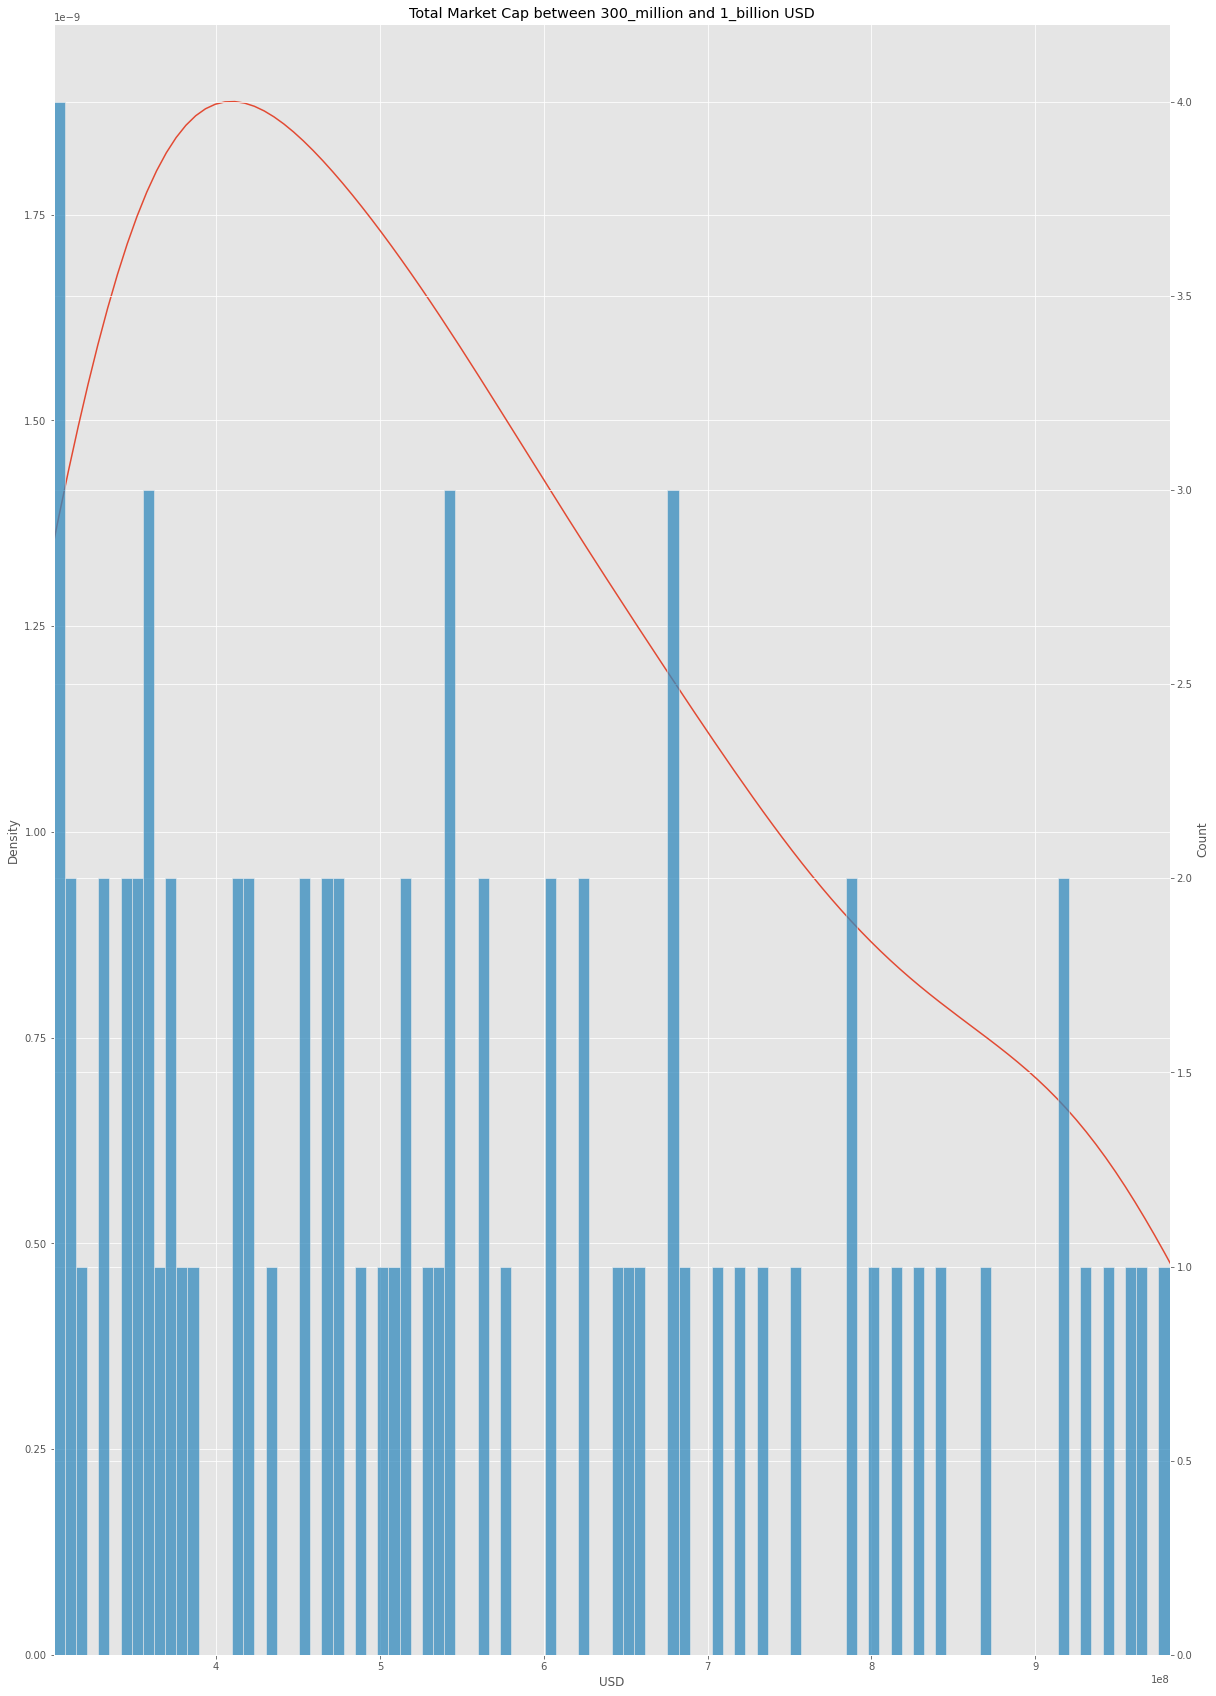

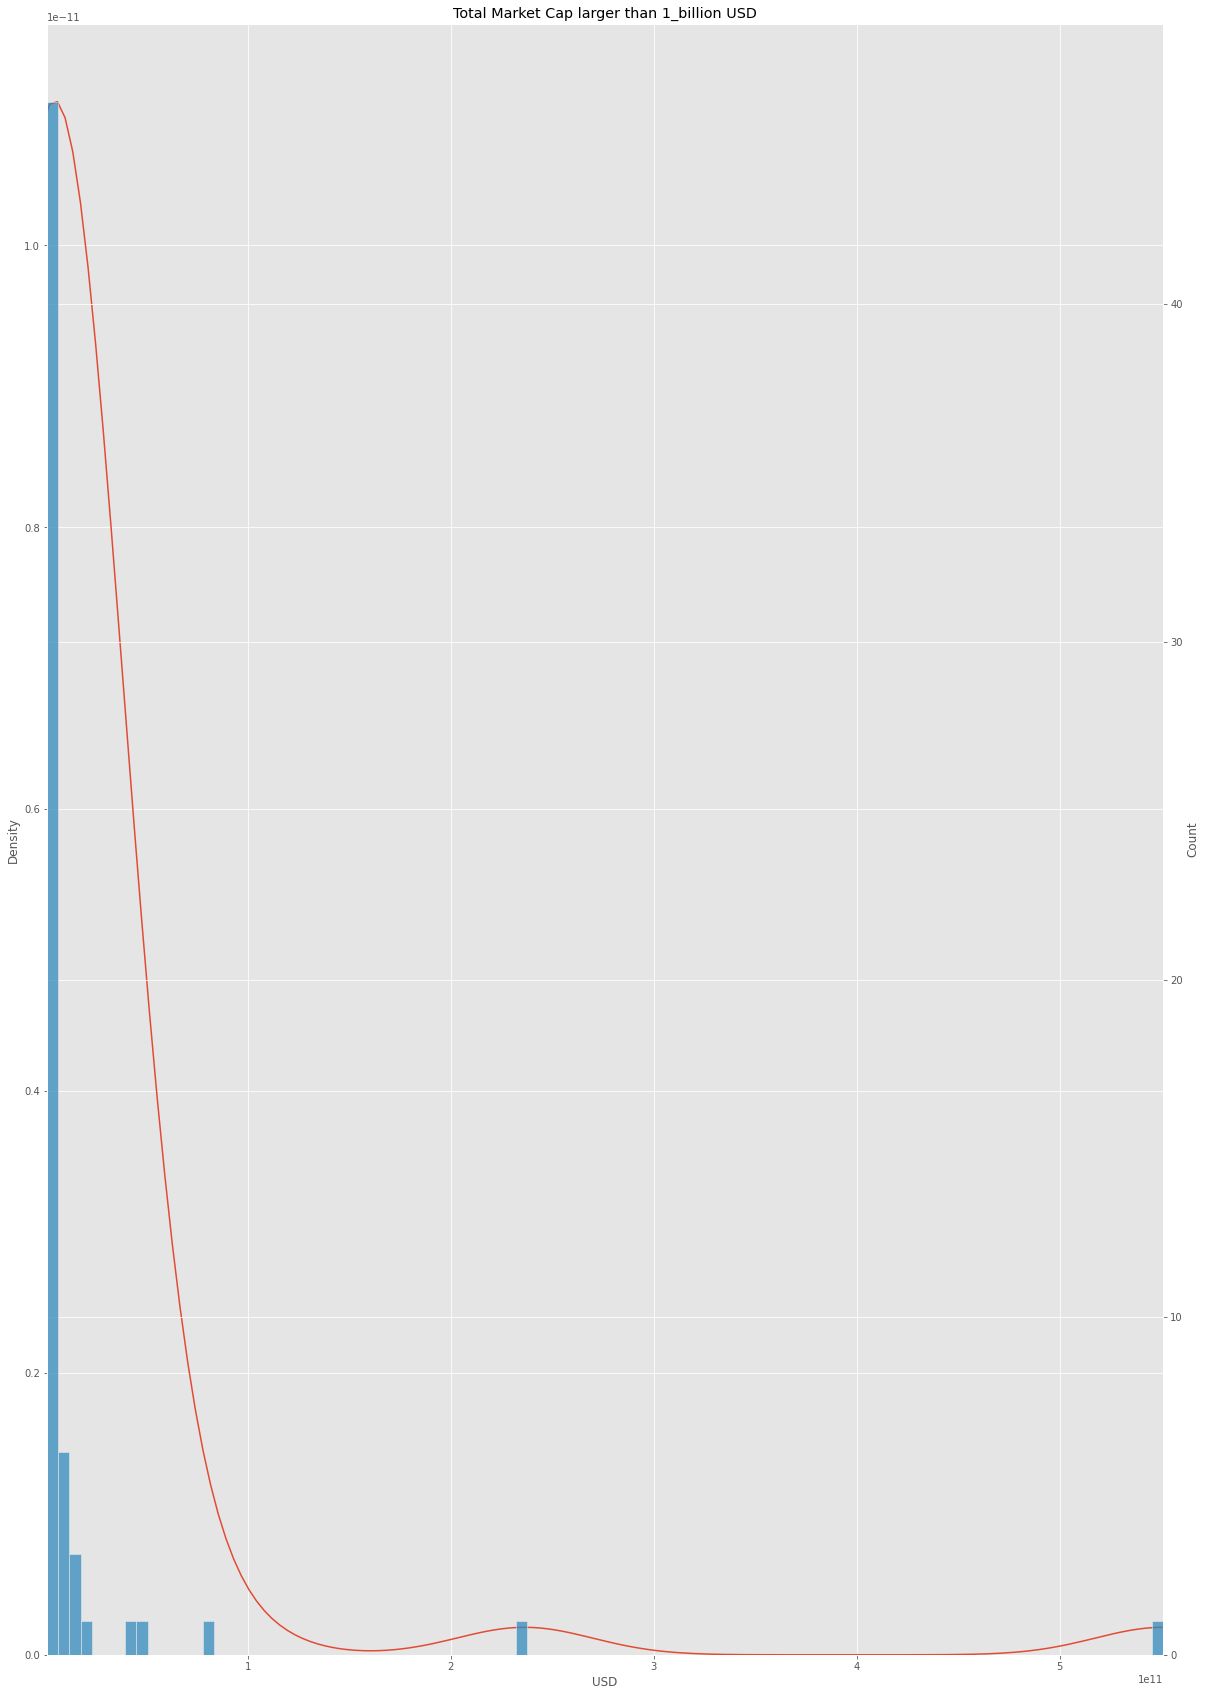

In [24]:
save_hist_of_market_cap_range_list(data_list=market_cap_list, atr='market_cap', range_name=market_range_str,
                                   prefix='Total Market Cap', x_title='USD')

In [25]:
plt.style.use('ggplot')

import itertools
market_cap_dict = coincap.loc[:,['id', 'market_cap']].sort_values('market_cap', ascending=False).set_index('id').to_dict()['market_cap']

newdic={}
for key, group in itertools.groupby(market_cap_dict, lambda k: 'All the rest' if (market_cap_dict[k] < 5000000000) else k):
     newdic[key] = sum([market_cap_dict[k] for k in list(group)])   

labels = np.array(list(newdic.keys()))
sizes = np.array(list(newdic.values()))
porcent = 100. * sizes/sizes.sum()

fig, ax = plt.subplots(figsize=(10, 10))

patches, texts = ax.pie(sizes, startangle = 90, radius=1.3)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

ax.axis('equal')
plt.legend(patches, labels, loc='best', fontsize=8)
plt.tight_layout()

plt.savefig('analysis/market_cap_pie_chart.png', dpi = 300)

plt.show()

NameError: name 'np' is not defined

# Trading Volume

In [ ]:
volume_range = [0, 1e4, 1e6]
volume_range_str = ['0', '1_thousand', '1_million']

print('Total Number of Project in Each Total Volum Range')
volume_list = get_number_of_project_in_range(coincap, 'total_volume', volume_range, volume_range_str)    

Total Number of Project in Each Total Volum Range
0 --> 1_thousand :  1183
1_thousand --> 1_million :  1633
1_million -->  oo:  708


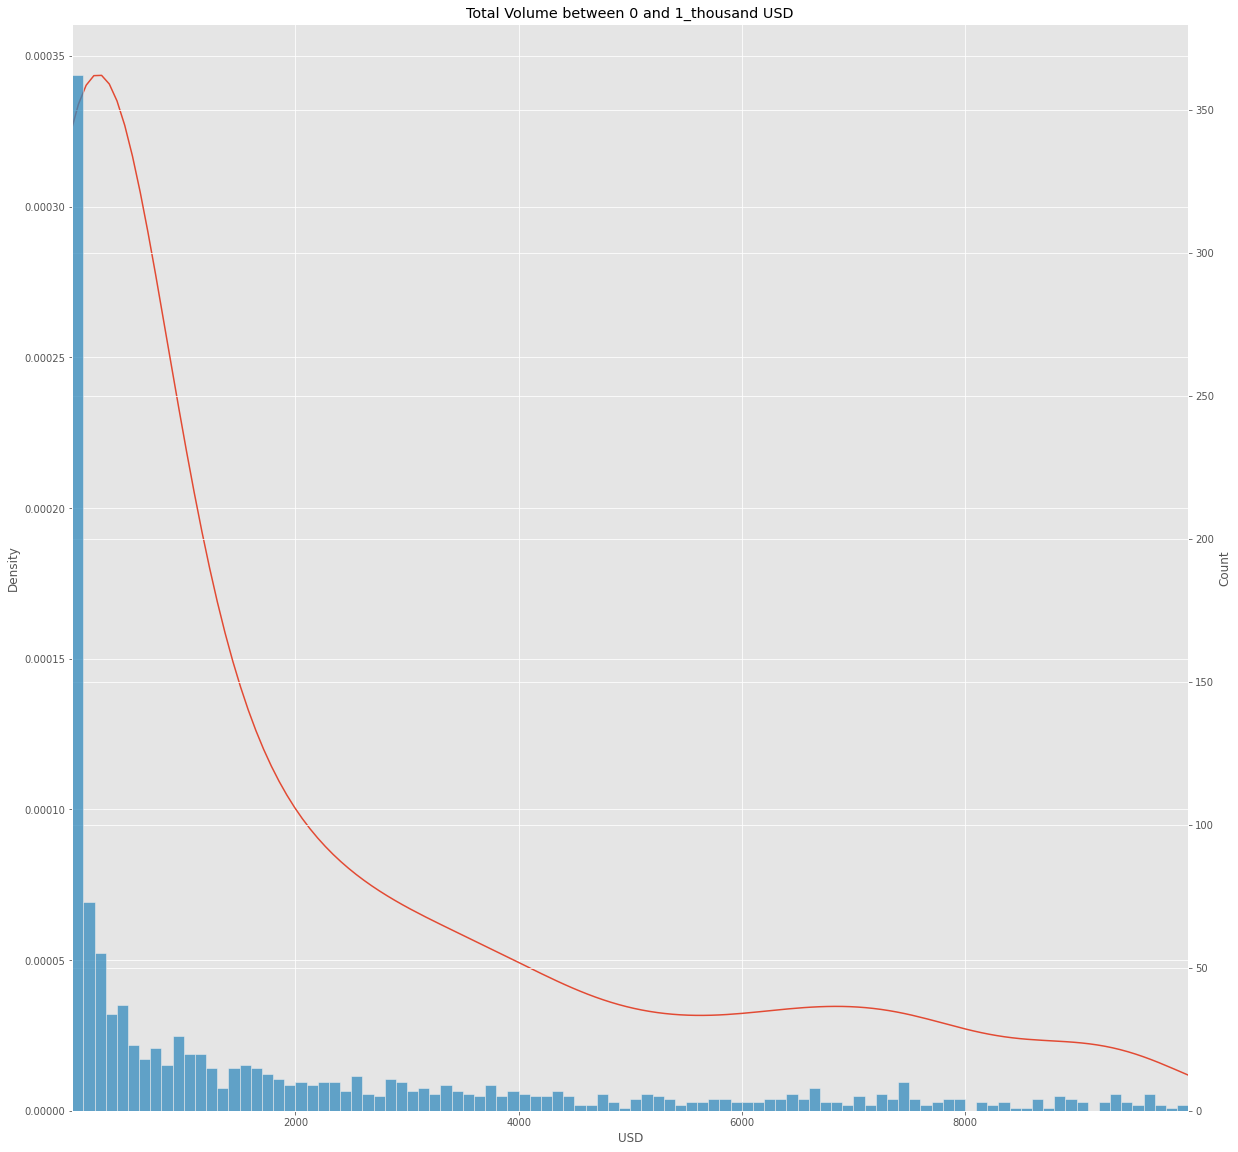

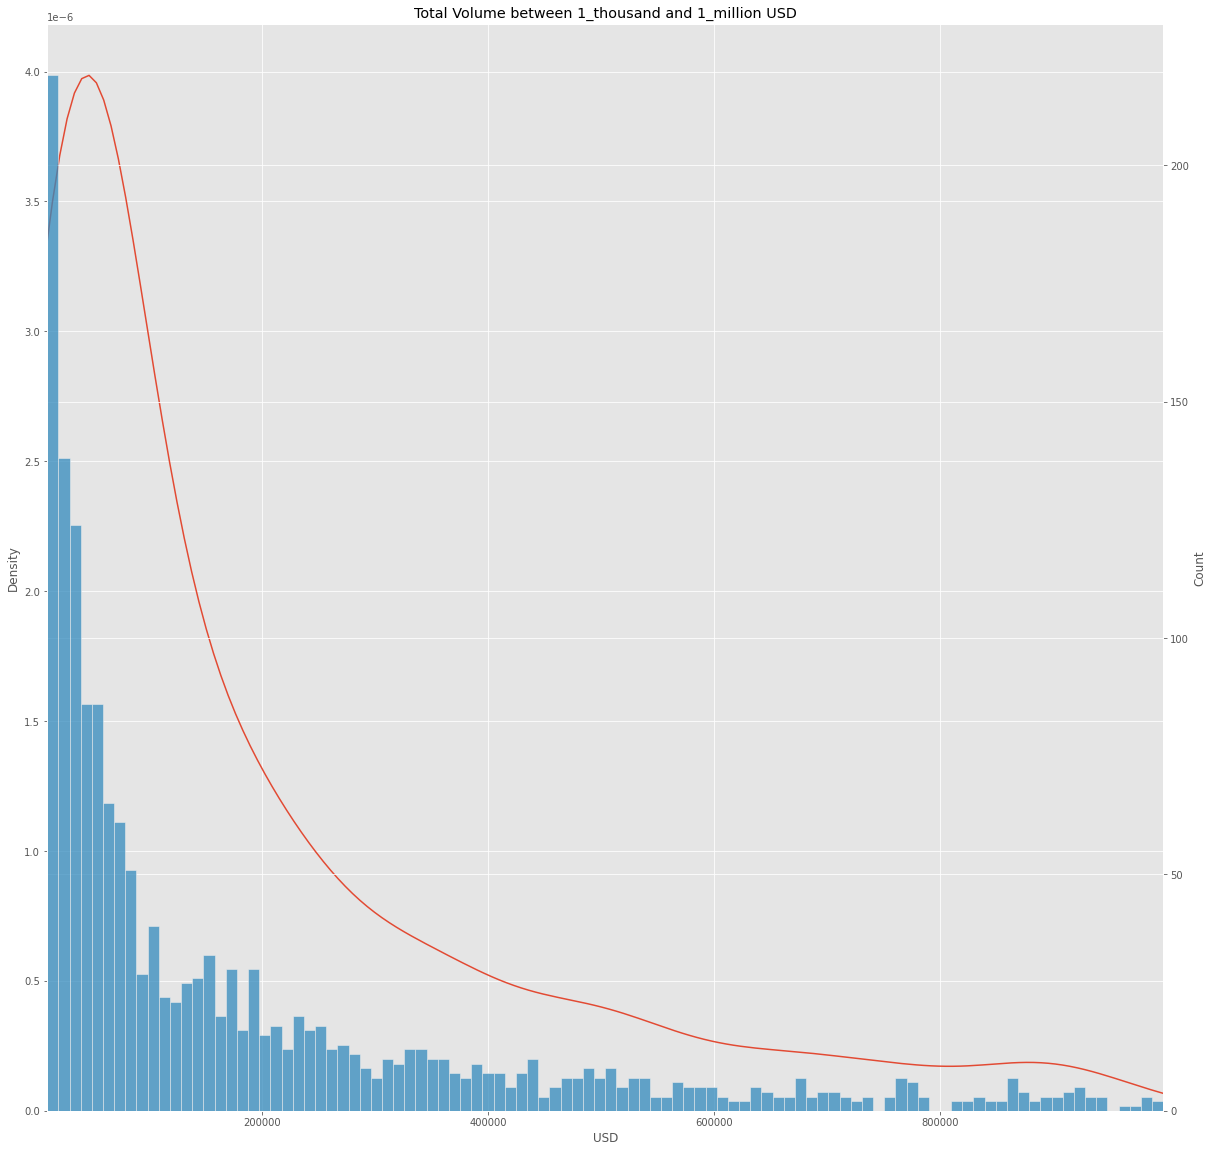

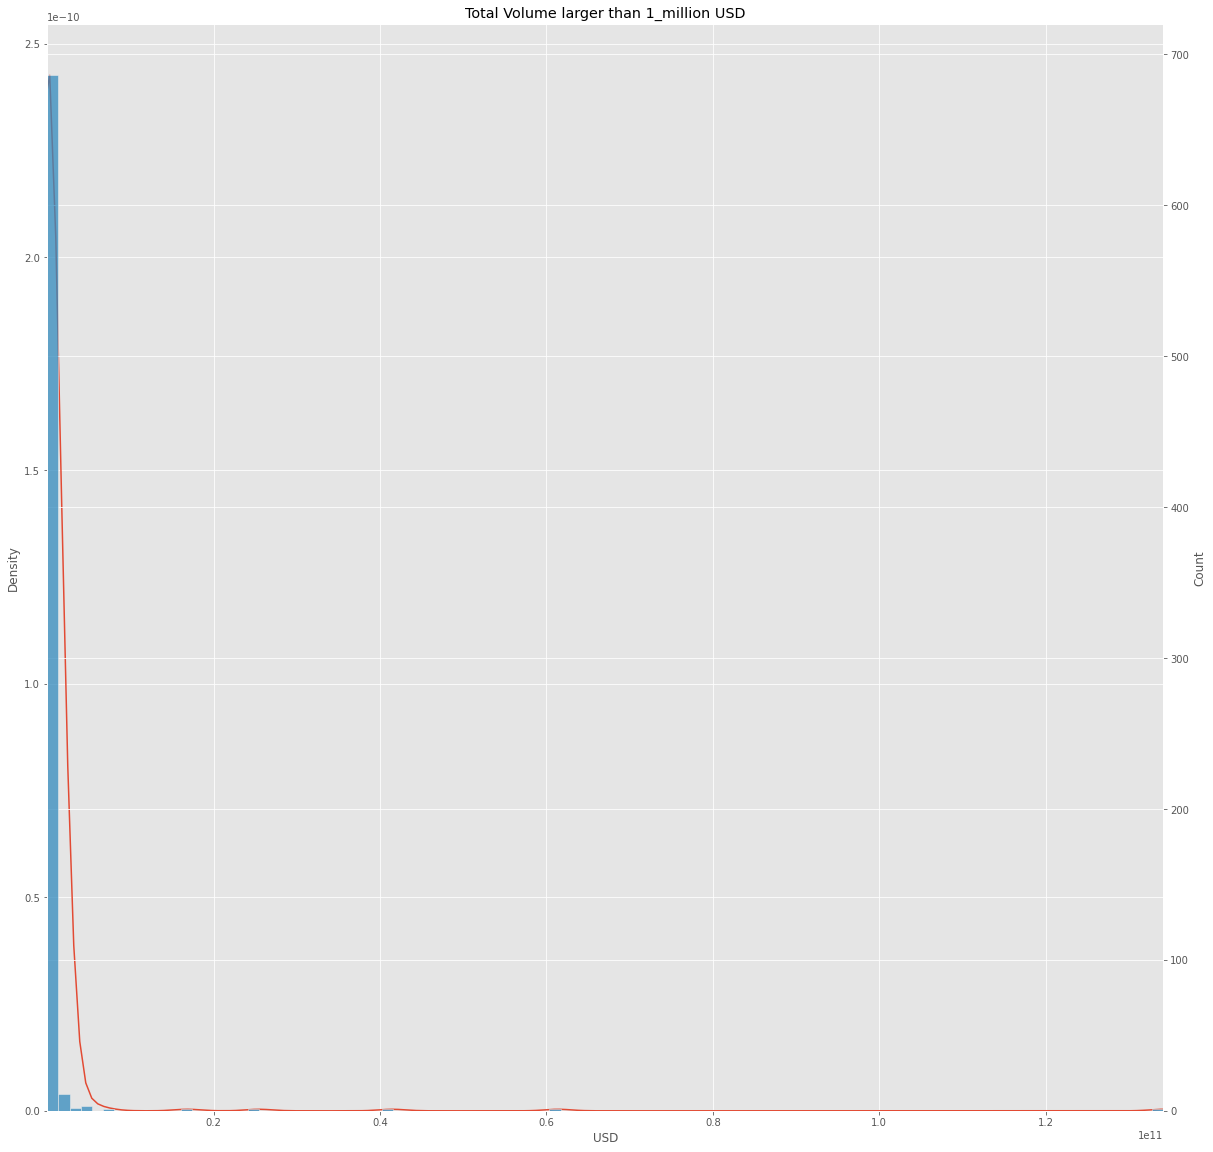

In [ ]:
save_hist_of_market_cap_range_list(data_list=volume_list, atr='total_volume', range_name=volume_range_str, 
                                   prefix='Total Volume', x_title='USD')

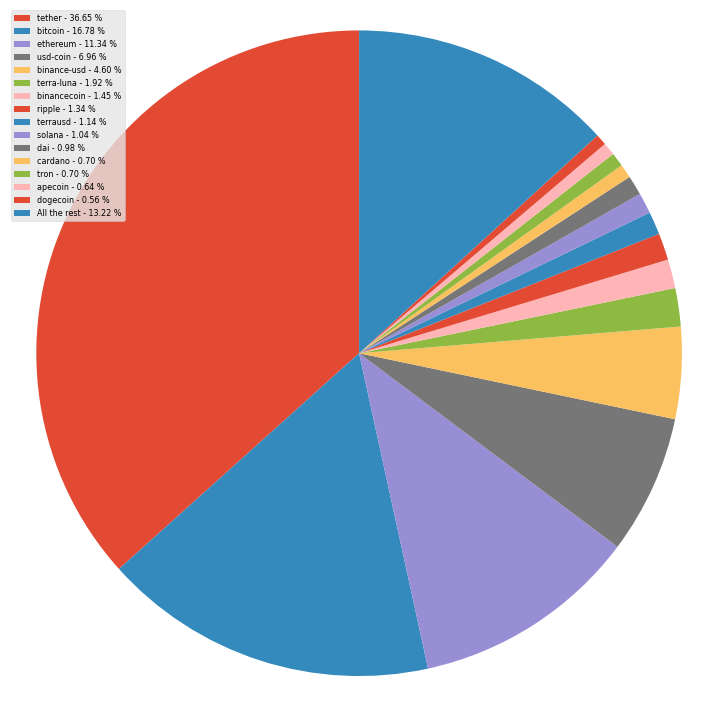

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

import itertools

total_volume_dict = coincap.loc[:,['id', 'total_volume']].sort_values('total_volume', ascending=False).set_index('id').to_dict()['total_volume']

newdic = {}
for key, group in itertools.groupby(total_volume_dict, lambda k: 'All the rest' if (total_volume_dict[k] < 2000000000) else k):
     newdic[key] = sum([total_volume_dict[k] for k in list(group)])   

labels = np.array(list(newdic.keys()))
sizes = np.array(list(newdic.values()))
porcent = 100. * sizes/sizes.sum()

fig, ax = plt.subplots(figsize=(10, 10))

patches, texts = ax.pie(sizes, startangle=90, radius=1.3)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

ax.axis('equal')
plt.legend(patches, labels, loc='best', fontsize=8)
plt.tight_layout()

plt.savefig('analysis/total_volume_pie_chart.png', dpi = 300)

plt.show()

# Circulating Supply

In [ ]:
circulating_supply_range = [0, 10e6, 100e6, 1e9]
circulating_supply_range_str = ['0', '1_million', '100_million', '1_billion']


print('Total Number of Project in Each Circulating Supply Range')
circulating_supply_list = get_number_of_project_in_range(coincap, 'circulating_supply', 
                                                         circulating_supply_range, circulating_supply_range_str)

    

Total Number of Project in Each Circulating Supply Range
0 --> 1_million :  915
1_million --> 100_million :  1115
100_million --> 1_billion :  935
1_billion -->  oo:  681


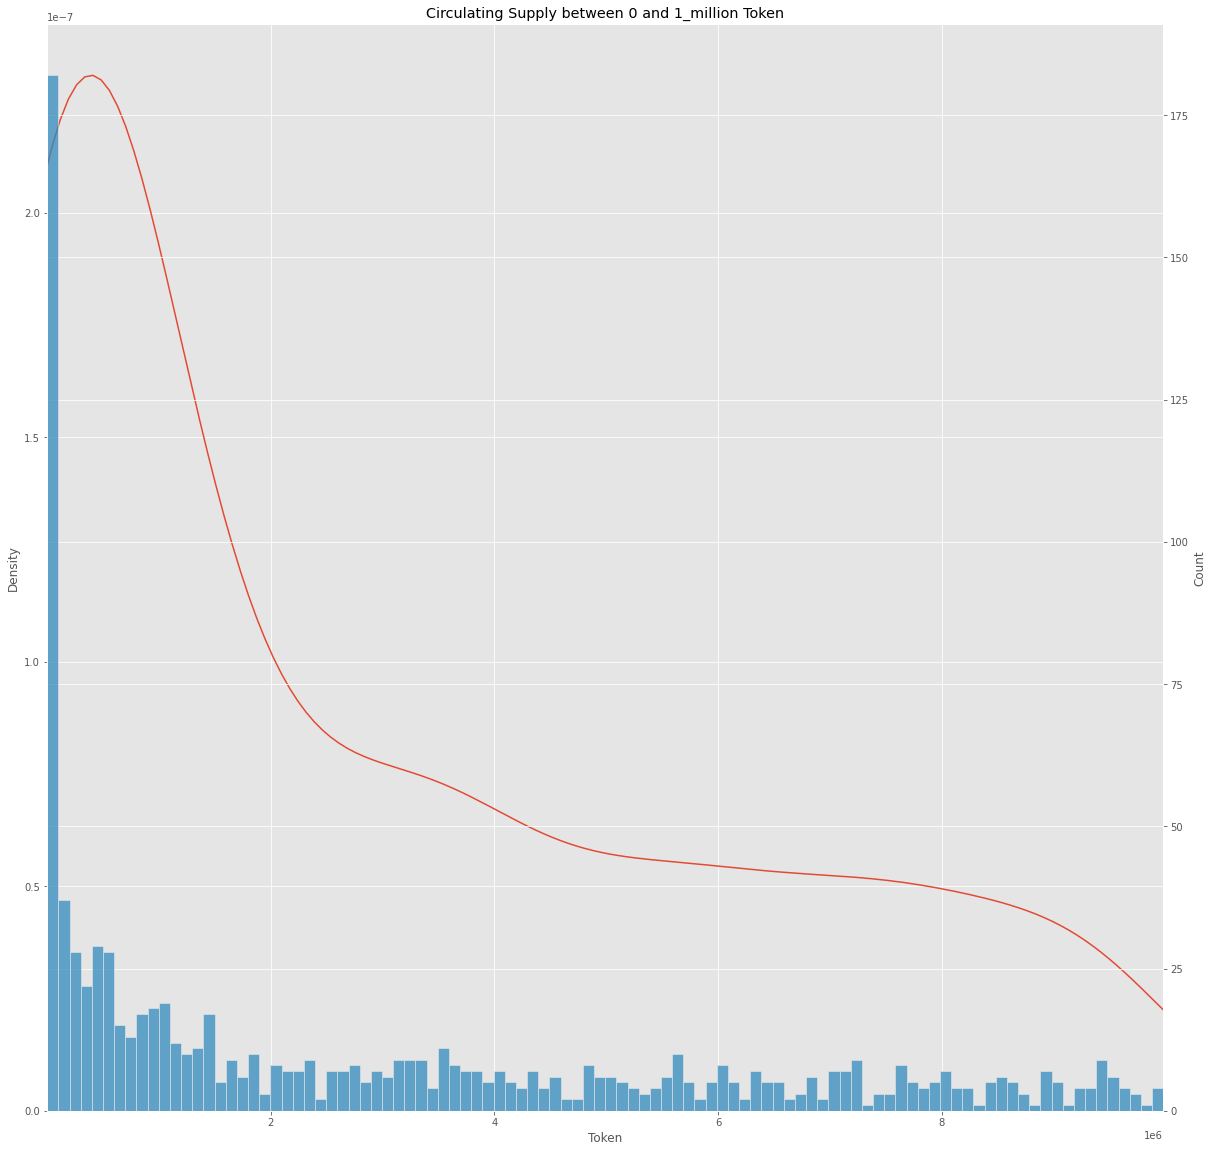

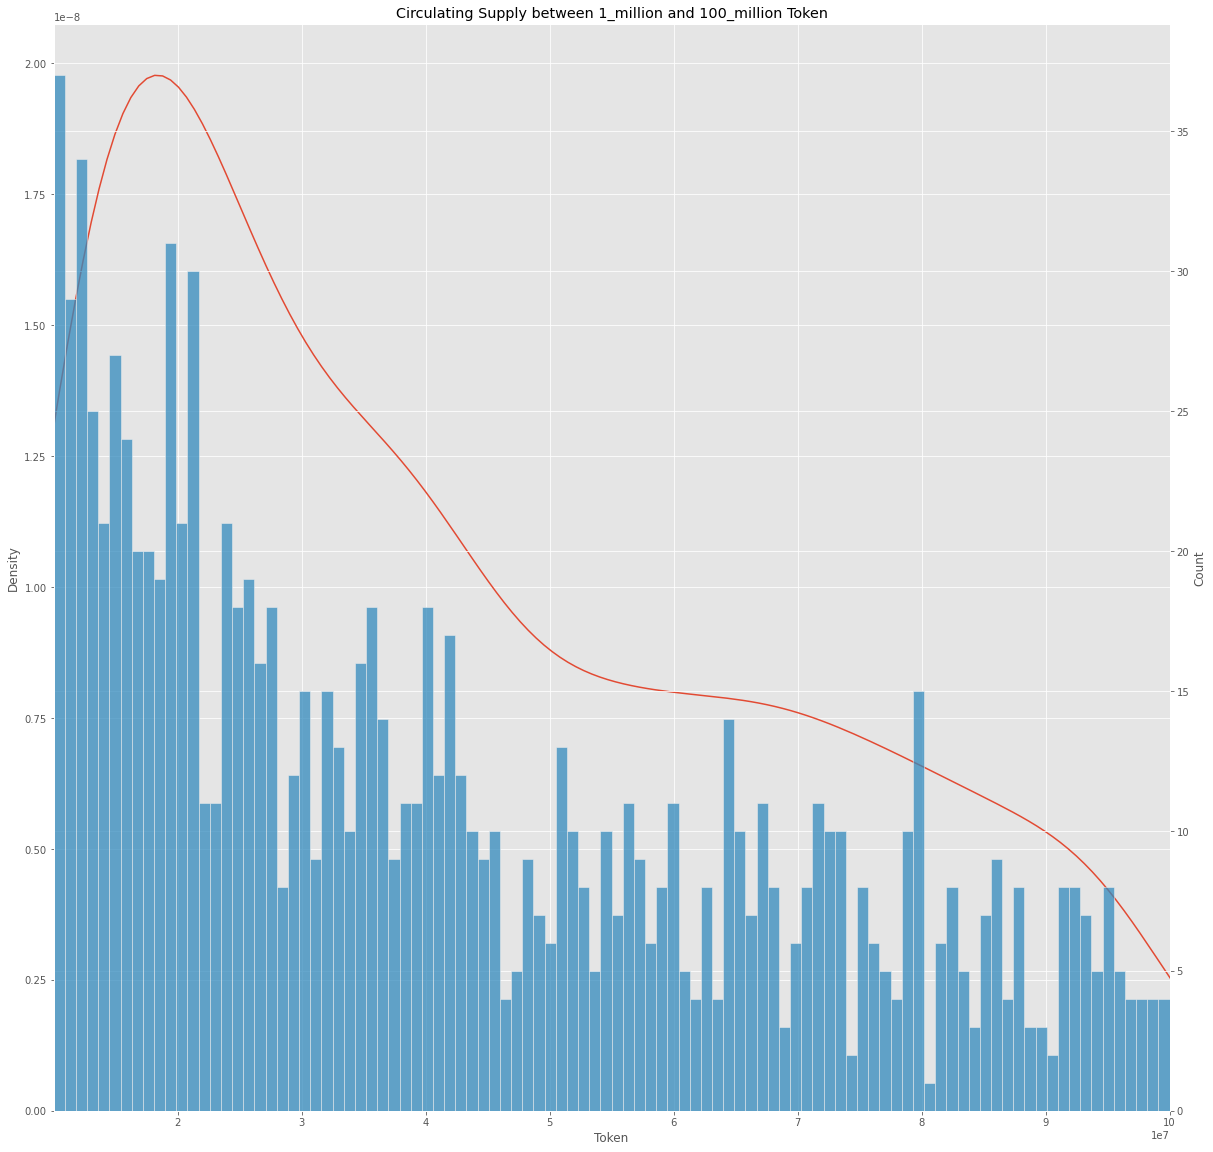

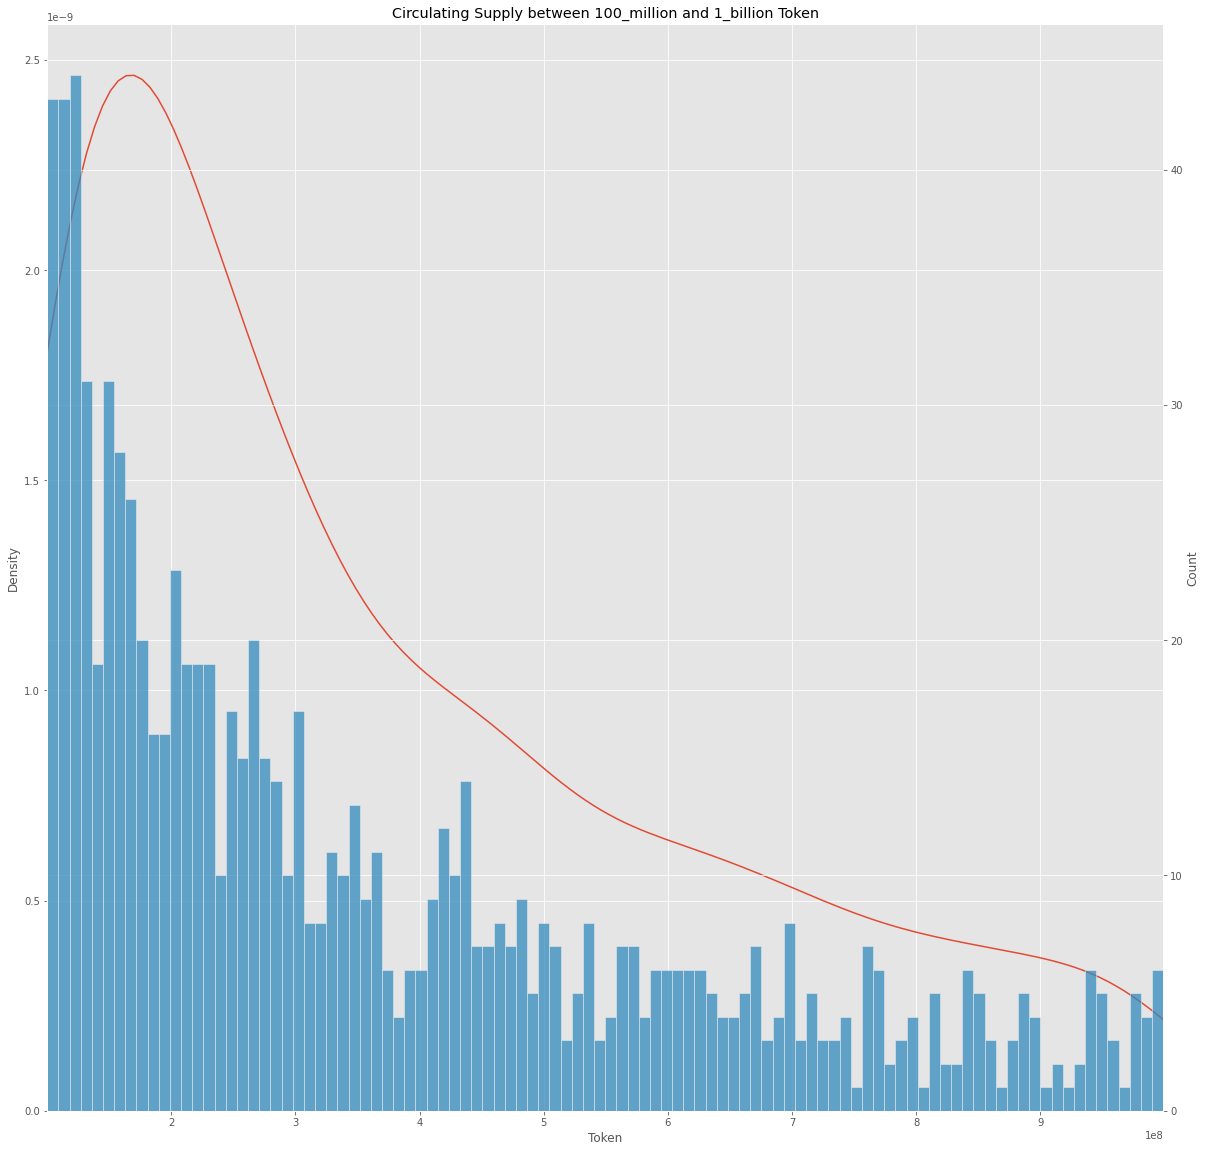

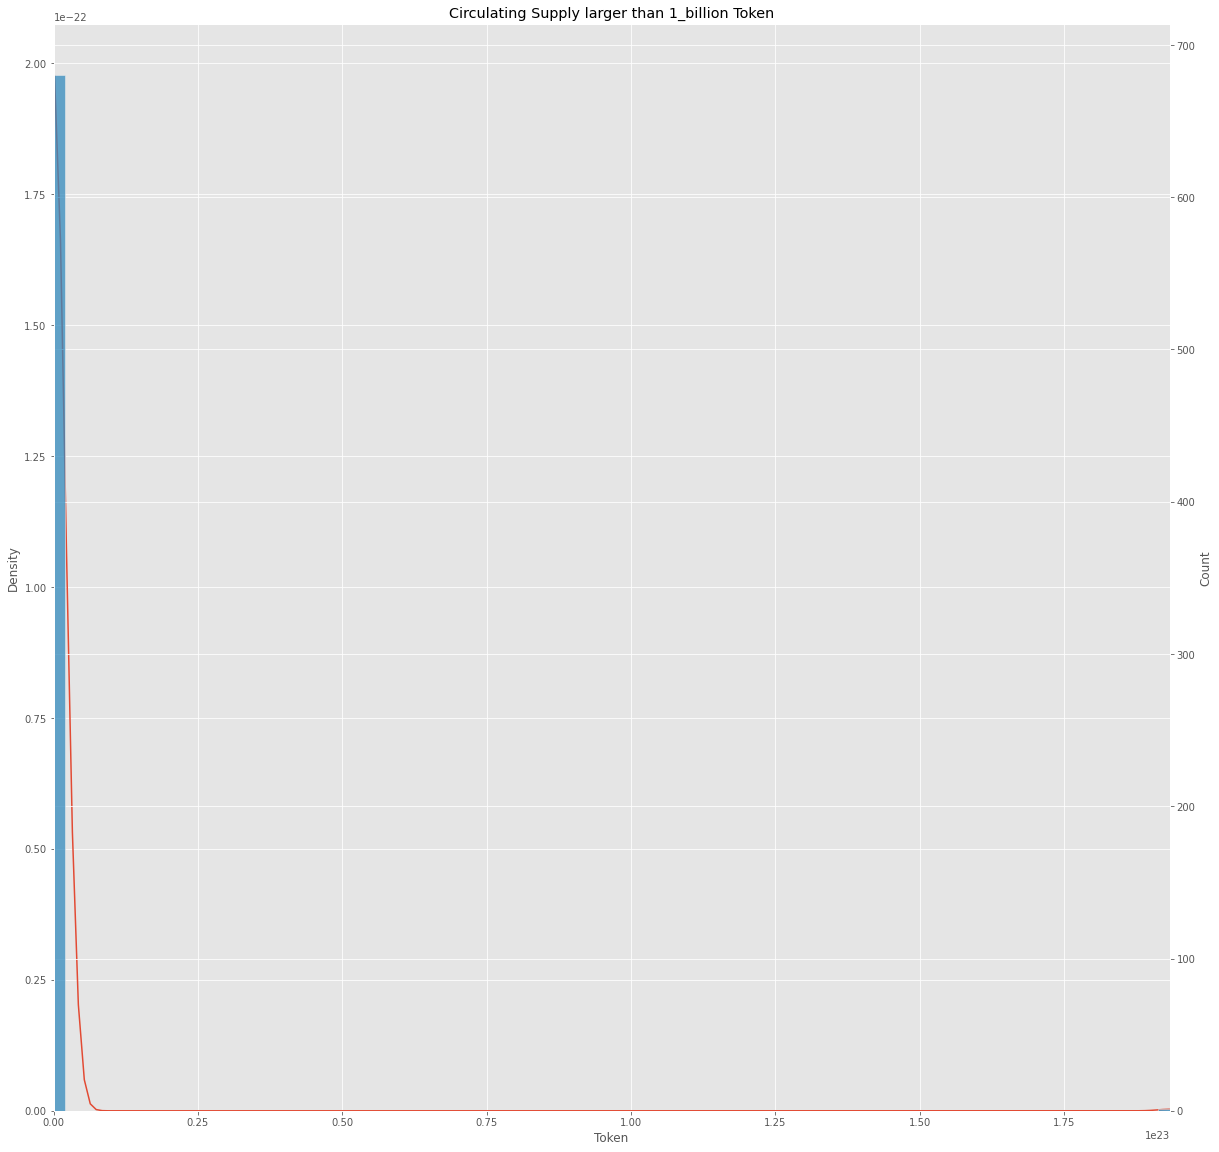

In [ ]:
save_hist_of_market_cap_range_list(circulating_supply_list, 'circulating_supply', circulating_supply_range_str,
                                   prefix='Circulating Supply', x_title='Token')

# Holder

In [ ]:
holder_range = [0, 1e4, 5e4, 5e5]
holder_range_str = ['0', '10_thousand', '50_thousand', '500_thousand']


print('Total Number of Project in Each Total Holder Range')
holder_list = get_number_of_project_in_range(coincap, 'total_holder', 
                                                         holder_range, holder_range_str)
    

Total Number of Project in Each Total Holder Range
0 --> 10_thousand :  1980
10_thousand --> 50_thousand :  622
50_thousand --> 500_thousand :  198
500_thousand -->  oo:  16


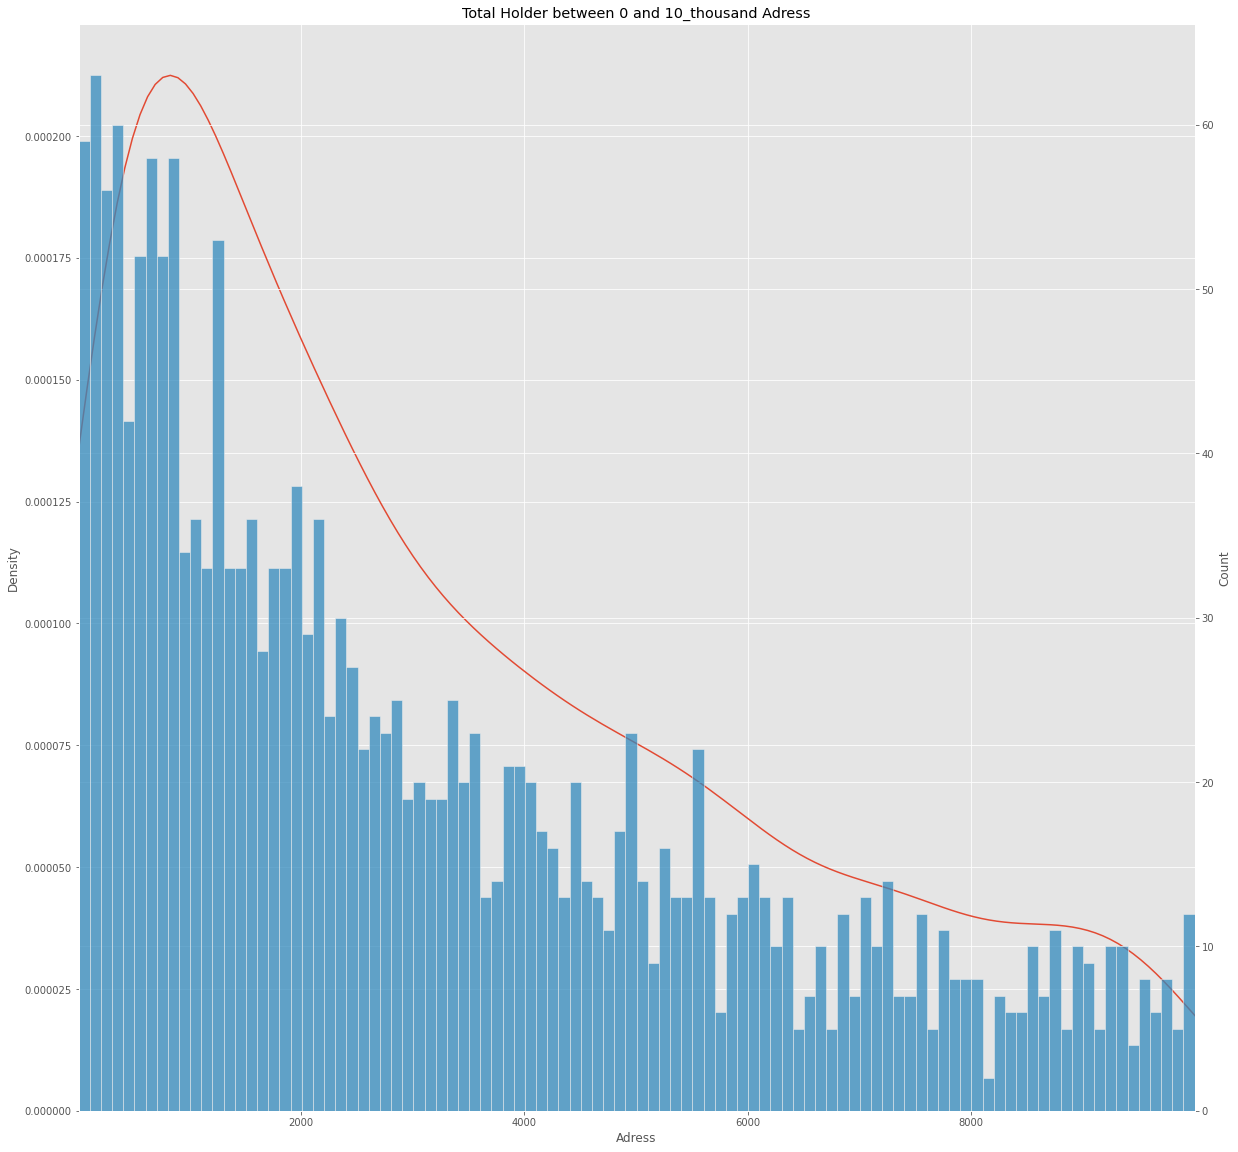

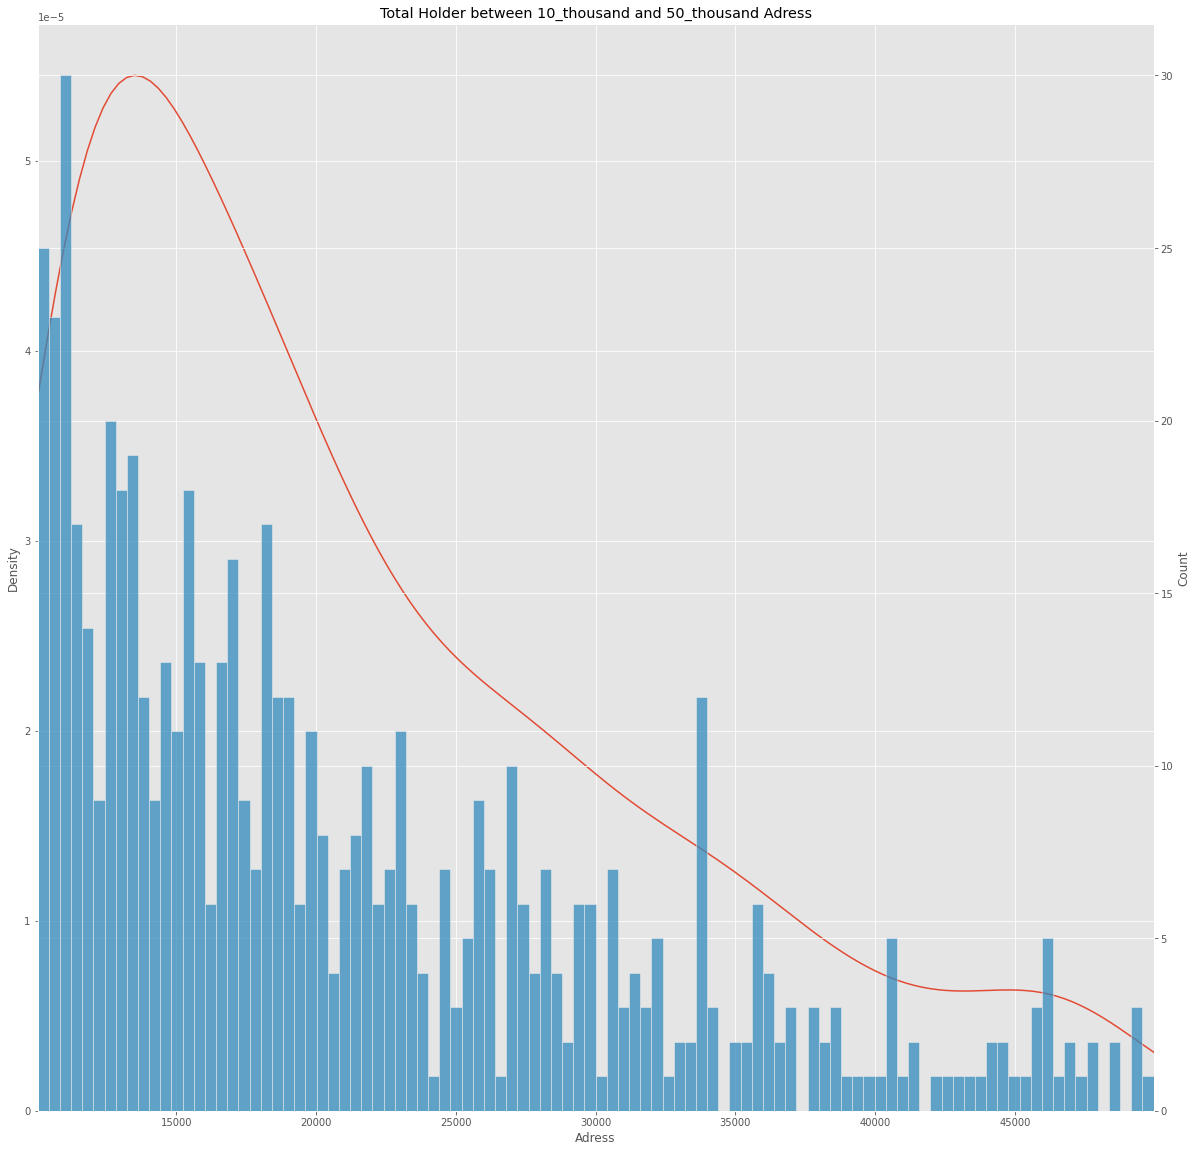

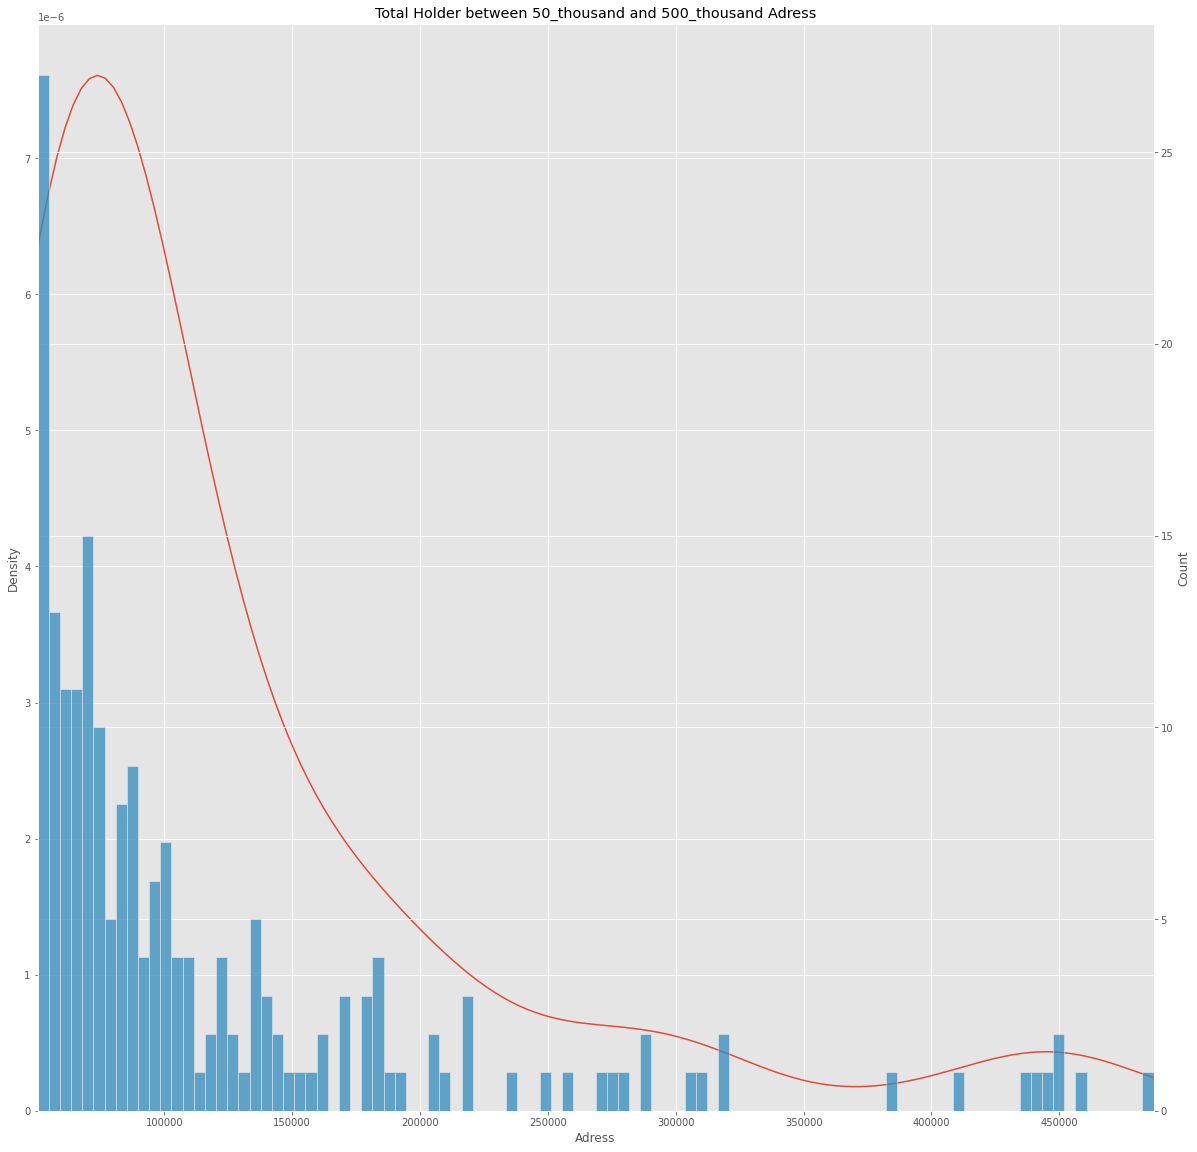

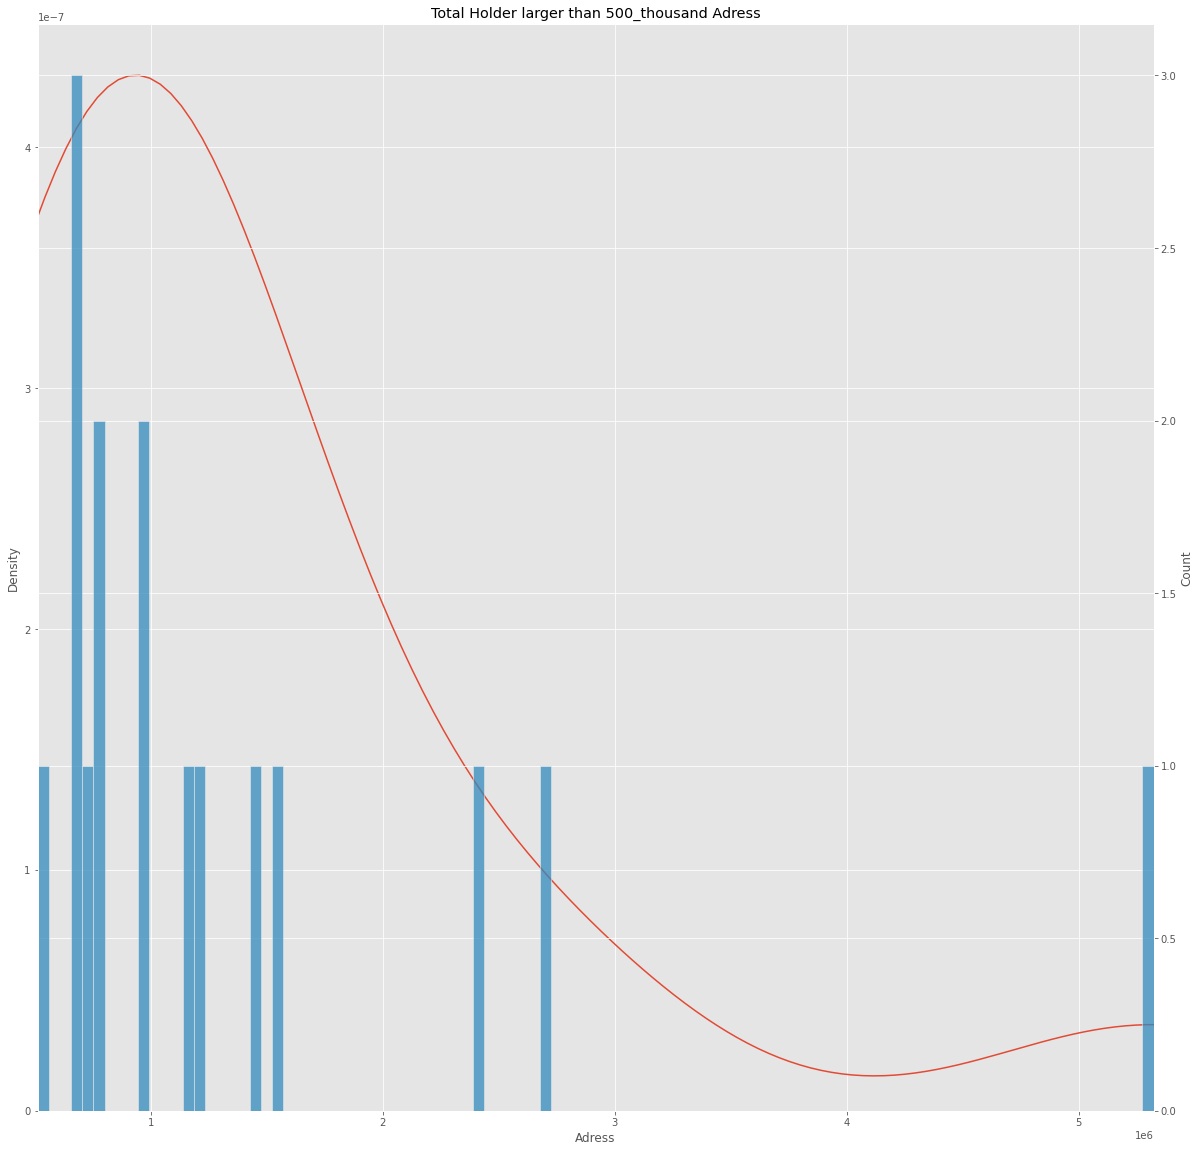

In [ ]:
save_hist_of_market_cap_range_list(holder_list, 'total_holder', holder_range_str,
                                   'Total Holder', 'Adress')